In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from langdetect import detect

cleaning the data

In [2]:
data_dir = "C:/Users/luke/OneDrive/Data Science Course/"
text_file_name = "osdg-community-data-v2024-04-01.csv"
text_df = pd.read_csv(data_dir + text_file_name,sep = "\t",  quotechar='"')
text_df.drop(text_df.columns.values[0],axis = 1, inplace=True)
text_df = text_df.query("agreement > 0.5 and (labels_positive - labels_negative) > 2").reset_index(drop=True)
#text_df["lang"] = text_df["text"].apply(lambda x: detect(x))
#text_df = text_df.query("lang == 'en'")
text_df.reset_index(inplace=True,drop=True)
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26526 entries, 0 to 26525
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text_id          26526 non-null  object 
 1   text             26526 non-null  object 
 2   sdg              26526 non-null  int64  
 3   labels_negative  26526 non-null  int64  
 4   labels_positive  26526 non-null  int64  
 5   agreement        26526 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.2+ MB


In [3]:
def count_word(corpus):
    result = 0
    for x in corpus:
        result += len(x.split())
    return result

Creating the function to find the top 50 words and plot them

In [4]:
def get_term_freq(corpus, ngram_range = (1, 1), stop_words = None, min_df = 2): # min_df has to be 2 or larger
    if stop_words == None :
        count_vectorizer = CountVectorizer(ngram_range = ngram_range, stop_words = None, min_df =min_df)
        count_vector = count_vectorizer.fit_transform(corpus).toarray()
        count_vector_df = pd.DataFrame(count_vector, columns=count_vectorizer.get_feature_names_out())
        term_freq = pd.DataFrame({"term": count_vector_df.columns.values, "freq" : count_vector_df.sum(axis=0)})
        term_freq = term_freq.sort_values(by = 'freq', ascending = False)
    else :
        count_vectorizer = CountVectorizer(ngram_range = ngram_range, stop_words = stop_words, min_df =min_df)
        count_vector = count_vectorizer.fit_transform(corpus).toarray()
        count_vector_df = pd.DataFrame(count_vector, columns=count_vectorizer.get_feature_names_out())
        term_freq = pd.DataFrame({"term": count_vector_df.columns.values, "freq" : count_vector_df.sum(axis=0)})
        term_freq = term_freq.sort_values(by = 'freq', ascending = False)
    term_freq = term_freq.head(50)
    term_freq['percentage'] = (term_freq['freq'] / count_word(corpus)) * 100

    plt.figure(figsize=(12, 6))
    bars = plt.bar(term_freq['term'], term_freq['freq'], color='skyblue', alpha=0.8)
    for bar, percentage in zip(bars, term_freq['percentage']):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom', fontsize=9, rotation=45)
    
    plt.title('Top 50 Term Frequencies', fontsize=14)
    plt.xlabel('Terms', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

    return term_freq


 Calling the get_term_freq function with and without stop_words on the whole corpus

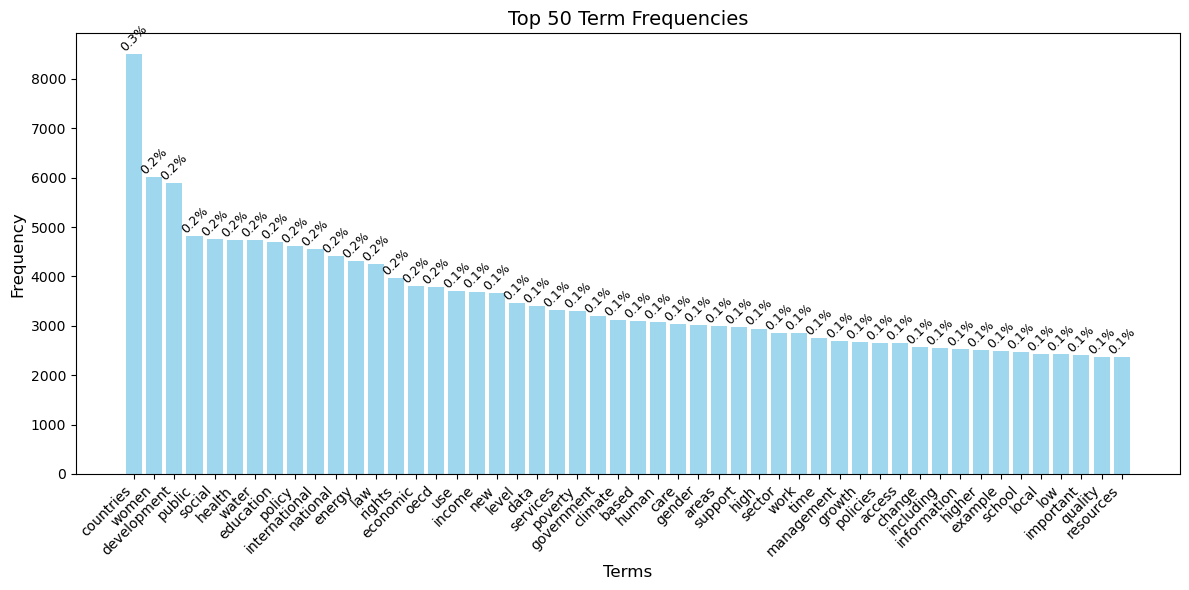

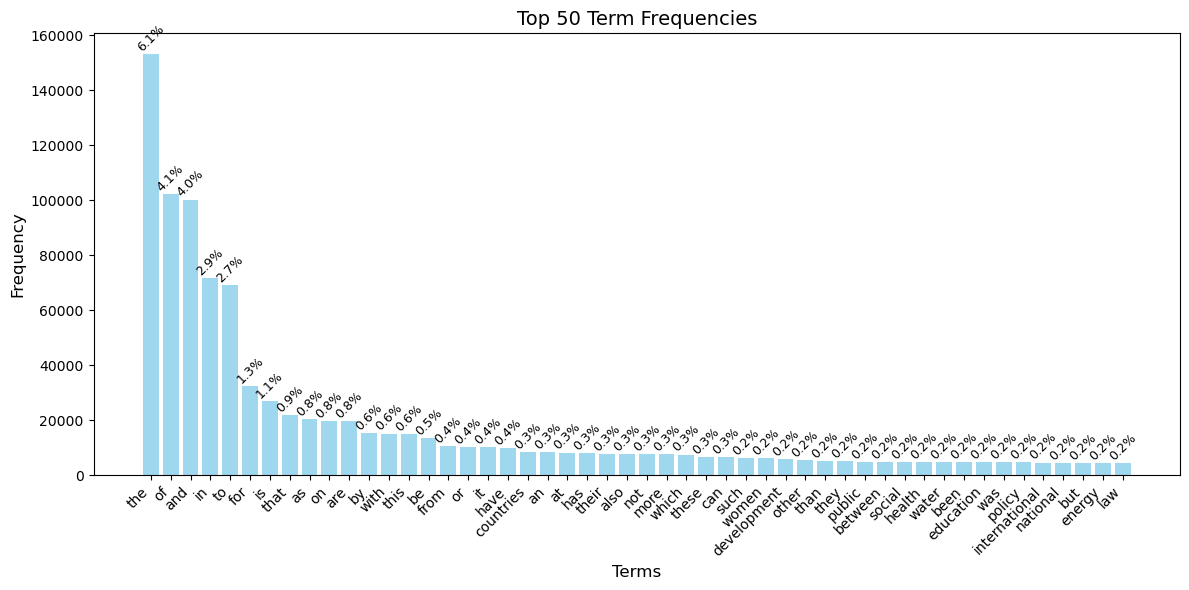

In [5]:
corpus = text_df.text
term_freq_1_1_remove_stop = get_term_freq(corpus, stop_words='english')
term_freq_1_1_keep_stop = get_term_freq(corpus, stop_words = None)

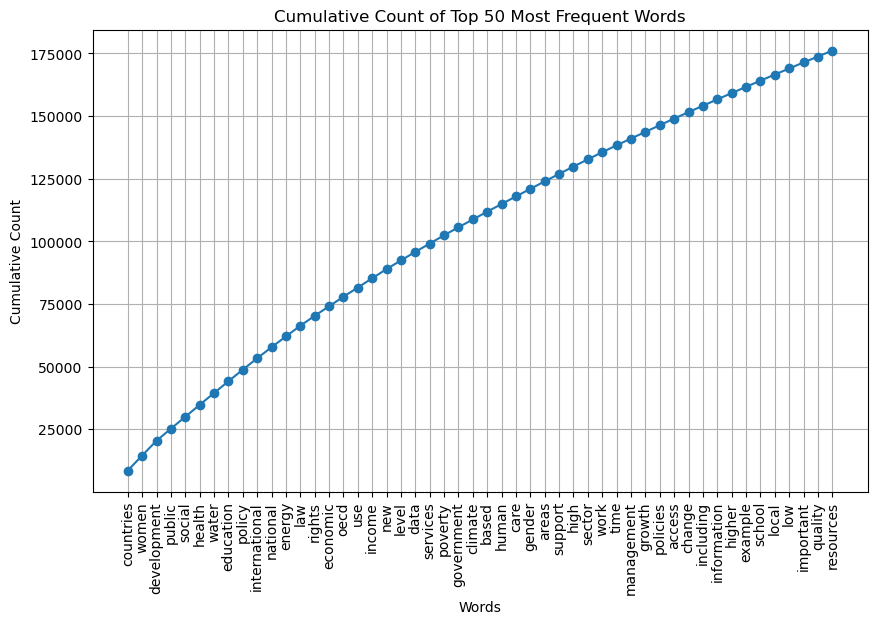

In [6]:
cumulative_counts = np.cumsum(term_freq_1_1_remove_stop.freq.values)
plt.figure(figsize=(10,6))
plt.plot(term_freq_1_1_remove_stop.term, cumulative_counts, marker='o')
plt.xticks(rotation=90)
plt.title("Cumulative Count of Top 50 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Cumulative Count")
plt.grid(True)
plt.show()

Calling the get_term_freq function with and without stop_words on only SDG8

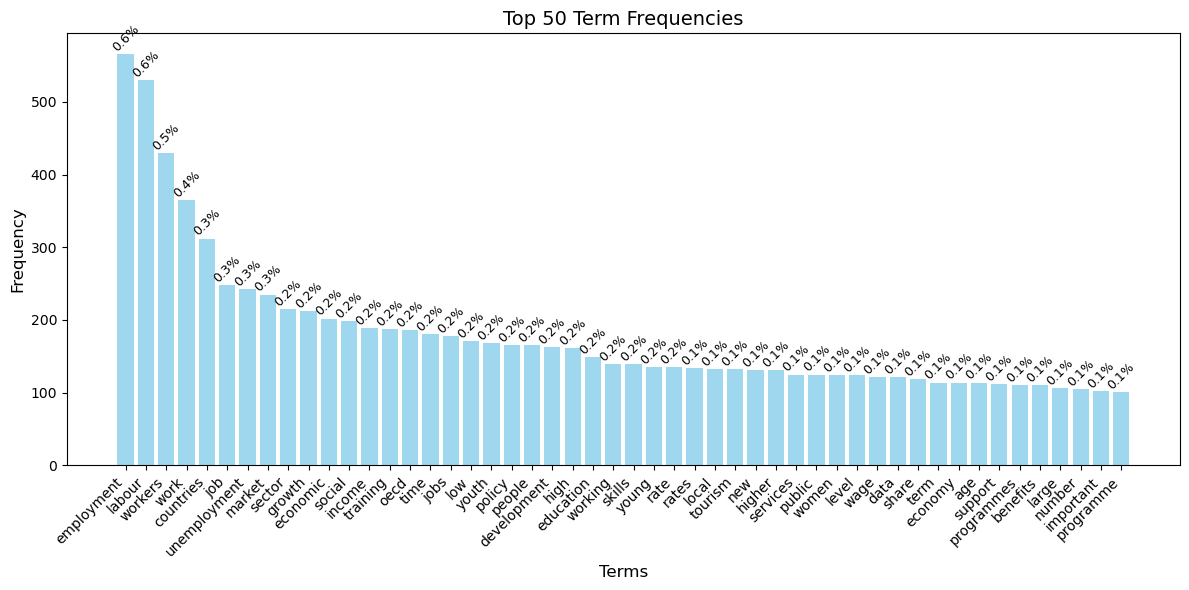

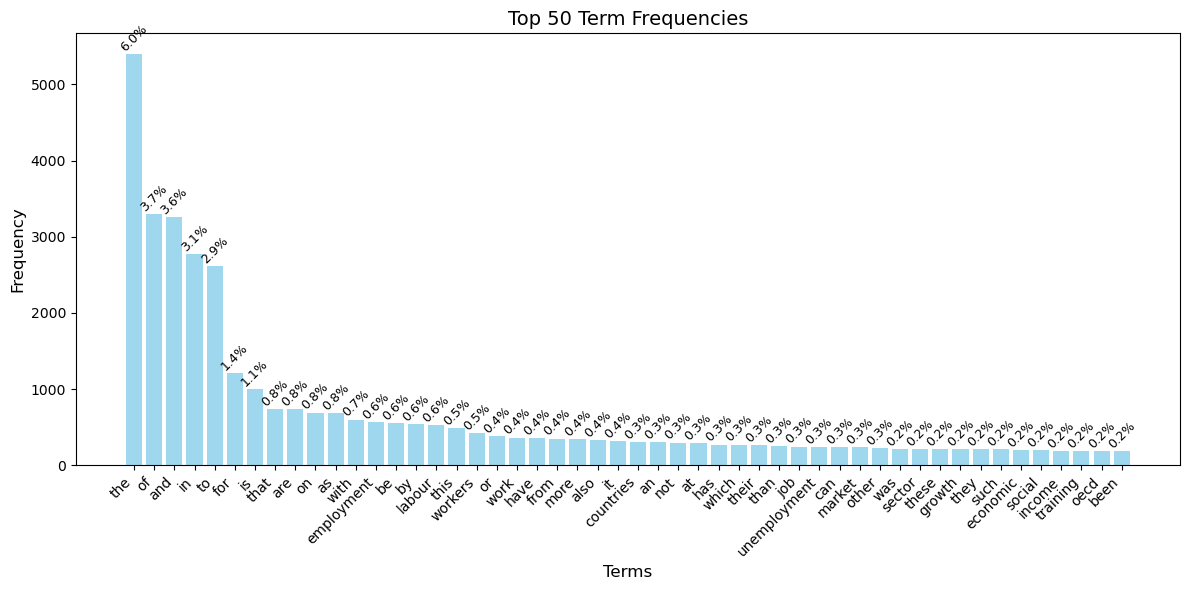

In [7]:
corpus = text_df[text_df.sdg == 8].text
term_freq_1_1_remove_stop = get_term_freq(corpus, stop_words='english')
term_freq_1_1_keep_stop = get_term_freq(corpus, stop_words = None)

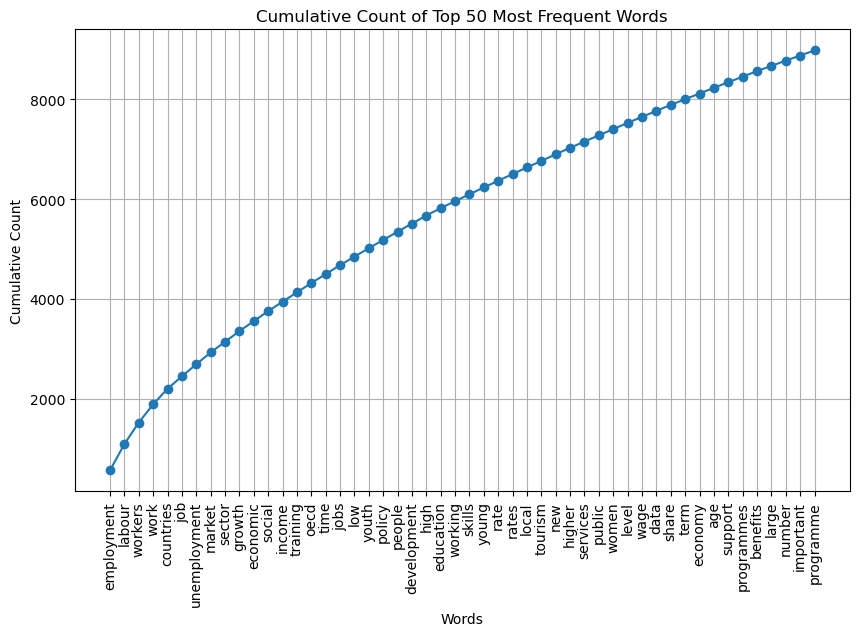

In [8]:
cumulative_counts = np.cumsum(term_freq_1_1_remove_stop.freq.values)
plt.figure(figsize=(10,6))
plt.plot(term_freq_1_1_remove_stop.term, cumulative_counts, marker='o')
plt.xticks(rotation=90)
plt.title("Cumulative Count of Top 50 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Cumulative Count")
plt.grid(True)
plt.show()
